In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
dataset = pd.read_csv("Real_estate.csv")
 
# Printing first 5 records of the dataset
print(dataset.head())

   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Price  
0     24.98298     121.54024   37.9  
1     24.98034     121.53951   42.2  
2     24.98746     121.54391   47.3  
3     24.98746     121.54391   54.8  
4     24.97937     121.54245   43.1  


In [3]:
# Categorizing data depending on datatype(object, int and float) and then calculate their number.

obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 0
Integer variables: 2
Float variables: 6


In [4]:
dataset['Price'] = dataset['Price'].fillna(dataset['Price'].mean())

In [5]:
new_dataset = dataset.dropna()

In [6]:
new_dataset.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Price                                     0
dtype: int64

In [7]:
# Converting categorical data into binary vectors

from sklearn.preprocessing import OneHotEncoder
 
s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',len(object_cols))

Categorical variables:
[]
No. of. categorical features:  0


In [8]:
print(new_dataset)

      No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 3

<AxesSubplot:>

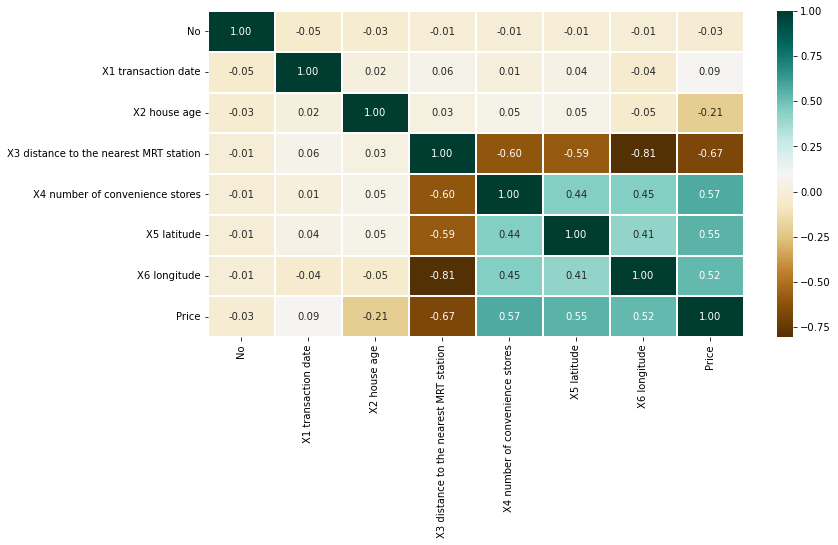

In [9]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),cmap = 'BrBG',fmt = '.2f',linewidths = 2,annot = True)

In [10]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
 
X = new_dataset.drop(['Price'], axis=1)
Y = new_dataset['Price']
 
# Split the training set into
# training and validation set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [11]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
 
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_test)
 
print(mean_absolute_percentage_error(Y_test, Y_pred))

0.19530065848111394


In [12]:
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_test)
 
print(mean_absolute_percentage_error(Y_test, Y_pred))

0.17047008545073733


In [13]:
from sklearn import metrics 
print(model_LR.predict([[3,2013.583,13.3,561.9845,5,24.98746,121.54391]]))

[49.63685266]


/Users/utkarshsingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
